# Utilizando o Apache Spark e demais ferramentas correlatas:
1. Defina um grafo direcionado de pelo menos 10 vértices. O grafo deve representar uma situação do mundo real, sendo que os dados podem ser extraídos de alguma fonte ou artificialmente criados.
2. Calcule o número de triângulos no grafo.
3. Calcule o coeficiente de clustering local dos três vértices com maior grau.
4. Determine os compoentens fortemente conectados e os componentes conectados. O quão eles diferem entre si?
5. Determine os clusters do grafo a partir da execução do algoritmo de propagação de rótulos.

In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [56]:
from pyspark import SparkConf
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
import networkx as nx
import json
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import community
from graphframes import *

## 1. Defina um grafo direcionado de pelo menos 10 vértices. O grafo deve representar uma situação do mundo real, sendo que os dados podem ser extraídos de alguma fonte ou artificialmente criados.

In [57]:
conf = SparkConf().setAppName('myapp').setMaster('local')
sc = SparkContext.getOrCreate(conf)
spark = SparkSession(sc)
nodes = spark.read.csv('data/facebook-network.csv', header=True)
rels = spark.read.csv('data/facebook-relationships.csv', header=True)
g = GraphFrame(nodes, rels)

In [58]:
import networkx as nx
import pandas as pd
import json

df = rels.withColumnRenamed("src","source").withColumnRenamed("dst","target").toPandas()

In [59]:
Graphtype = nx.DiGraph()
graph_nx = nx.from_pandas_edgelist(df, create_using = Graphtype)

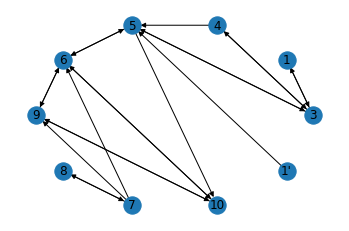

In [60]:
plt.subplot(111)
nx.draw_shell(graph_nx, nlist = [graph_nx.nodes], with_labels=True)

## 2. Calcule o número de triângulos no grafo.

In [61]:
tri_graph = [way for way in nx.simple_cycles(graph_nx) if len(way) == 3]

print("Triângulos:", tri_graph)
print("Total de Triângulos:", len(tri_graph))

Triângulos: [['6', '5', '10'], ['6', '10', '9'], ['6', '9', '10'], ['3', '4', '5']]
Total de Triângulos: 4


## 3. Calcule o coeficiente de clustering local dos três vértices com maior grau.

In [62]:
graph_nx.degree(graph_nx.nodes)

DiDegreeView({'3': 6, '1': 2, '4': 3, '5': 7, '6': 7, '9': 5, '8': 2, '7': 4, '10': 5, "1'": 1})

In [63]:
print('Coeficiente:', nx.clustering(graph_nx, '6'))
print('Coeficiente:', nx.clustering(graph_nx, '5'))
print('Coeficiente:', nx.clustering(graph_nx, '3'))

Coeficiente: 0.3888888888888889
Coeficiente: 0.21052631578947367
Coeficiente: 0.16666666666666666


## 4. Determine os componentes fortemente conectados


In [64]:
print([conx for conx in nx.strongly_connected_components(graph_nx)])

[{'6', '3', '1', '10', '4', '9', '5'}, {'8', '7'}, {"1'"}]


## 5. Determine os clusters do grafo a partir da execução do algoritmo de propagação de rótulos.

In [65]:
labl_propa = g.labelPropagation(maxIter = 50)
labl_propa.select("id", "label").show()

+---+-------------+
| id|        label|
+---+-------------+
|  8| 223338299392|
|  4| 420906795008|
|  6| 644245094400|
| 10| 644245094400|
|  5| 420906795008|
|  3| 154618822656|
|  9| 420906795008|
|  1| 420906795008|
|  7|  25769803776|
|  2|1623497637888|
+---+-------------+

